In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score, mean_squared_error
pd.options.display.max_rows = 999


In [190]:
# pandas.options.display.float_format = '{:,.2f}'.format

In [4]:
#version 3
def statsmodels_train_test_split(df, stratify=None, **kwargs):

    if stratify is None:
        y, X = df.iloc[:,0], df.drop(columns=df.columns[0])
        X_train, X_test, y_train, y_test = train_test_split(X,y, **kwargs)
    else:
        y, X = stratify, df.drop(columns = stratify.name)
        X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, **kwargs)
    
    return pd.concat([X_train, y_train], axis=1), pd.concat([X_test, y_test], axis=1)

In [7]:
# load dataframes 
artists = pd.read_csv('/Users/TheUnit/Desktop/Marilyn-FinalCapstone/artists.csv')
content = pd.read_csv('/Users/TheUnit/Desktop/Marilyn-FinalCapstone/content.csv')
genres = pd.read_csv('/Users/TheUnit/Desktop/Marilyn-FinalCapstone/genres.csv')
labels = pd.read_csv('/Users/TheUnit/Desktop/Marilyn-FinalCapstone/labels.csv')
reviews = pd.read_csv('/Users/TheUnit/Desktop/Marilyn-FinalCapstone/reviews.csv')
years = pd.read_csv('/Users/TheUnit/Desktop/Marilyn-FinalCapstone/years.csv')

In [6]:
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18831 entries, 0 to 18830
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18831 non-null  int64 
 1   reviewid    18831 non-null  int64 
 2   artist      18829 non-null  object
dtypes: int64(2), object(1)
memory usage: 441.5+ KB


In [7]:
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18393 entries, 0 to 18392
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18393 non-null  int64 
 1   reviewid    18393 non-null  int64 
 2   content     18383 non-null  object
dtypes: int64(2), object(1)
memory usage: 431.2+ KB


In [8]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22680 entries, 0 to 22679
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  22680 non-null  int64 
 1   reviewid    22680 non-null  int64 
 2   genre       20313 non-null  object
dtypes: int64(2), object(1)
memory usage: 531.7+ KB


In [7]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20190 entries, 0 to 20189
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20190 non-null  int64 
 1   reviewid    20190 non-null  int64 
 2   label       20143 non-null  object
dtypes: int64(2), object(1)
memory usage: 473.3+ KB


In [9]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18393 entries, 0 to 18392
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      18393 non-null  int64  
 1   reviewid        18393 non-null  int64  
 2   title           18391 non-null  object 
 3   artist          18391 non-null  object 
 4   url             18393 non-null  object 
 5   score           18393 non-null  float64
 6   best_new_music  18393 non-null  int64  
 7   author          18393 non-null  object 
 8   author_type     14487 non-null  object 
 9   pub_date        18393 non-null  object 
 10  pub_weekday     18393 non-null  int64  
 11  pub_day         18393 non-null  int64  
 12  pub_month       18393 non-null  int64  
 13  pub_year        18393 non-null  int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 2.0+ MB


In [10]:
years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19108 entries, 0 to 19107
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  19108 non-null  int64  
 1   reviewid    19108 non-null  int64  
 2   year        18702 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 448.0 KB


In [11]:
artists.head()

Unnamed: 0  reviewid          artist
0           0     22703  massive attack
1           1     22721        krallice
2           2     22659    uranium club
3           3     22661         kleenex
4           4     22661         liliput

In [12]:
content.head()

Unnamed: 0  reviewid                                            content
0           0     22703  “Trip-hop” eventually became a ’90s punchline,...
1           1     22721  Eight years, five albums, and two EPs in, the ...
2           2     22659  Minneapolis’ Uranium Club seem to revel in bei...
3           3     22661  Kleenex began with a crash. It transpired one ...
4           4     22725  It is impossible to consider a given release b...

In [13]:
genres.head()

Unnamed: 0  reviewid       genre
0           0     22703  electronic
1           1     22721       metal
2           2     22659        rock
3           3     22661        rock
4           4     22725  electronic

In [14]:
labels.head()

Unnamed: 0  reviewid               label
0           0     22703              virgin
1           1     22721           hathenter
2           2     22659        static shock
3           3     22659  fashionable idiots
4           4     22661     kill rock stars

In [93]:
reviews.head()

Unnamed: 0  reviewid                 title            artist  \
0           0     22703             mezzanine    massive attack   
1           1     22721          prelapsarian          krallice   
2           2     22659  all of them naturals      uranium club   
3           3     22661           first songs  kleenex, liliput   
4           4     22725             new start              taso   

                                                 url  score  best_new_music  \
0  http://pitchfork.com/reviews/albums/22703-mezz...    9.3               0   
1  http://pitchfork.com/reviews/albums/22721-prel...    7.9               0   
2  http://pitchfork.com/reviews/albums/22659-all-...    7.3               0   
3  http://pitchfork.com/reviews/albums/22661-firs...    9.0               1   
4  http://pitchfork.com/reviews/albums/22725-new-...    8.1               0   

           author               author_type    pub_date  pub_weekday  pub_day  \
0     nate patrin               contributor  2017-01-08            6        8   
1        zoe camp               contributor  2017-01-07            5        7   
2  david glickman               contributor  2017-01-07            5        7   
3      jenn pelly  associate reviews editor  2017-01-06            4        6   
4    kevin lozano        tracks coordinator  2017-01-06            4        6   

   pub_month  pub_year  
0          1      2017  
1          1      2017  
2          1      2017  
3          1      2017  
4          1      2017

In [16]:
years.head()

Unnamed: 0  reviewid    year
0           0     22703  1998.0
1           1     22721  2016.0
2           2     22659  2016.0
3           3     22661  2016.0
4           4     22725  2016.0

In [17]:
years.columns

Index(['Unnamed: 0', 'reviewid', 'year'], dtype='object')

In [8]:
# merging the dataframes 
# use merge, join on review ID 

reviews_merge = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(artists,content,on='reviewid'),genres,on='reviewid'),labels ,on='reviewid'), reviews ,on='reviewid'), years ,on='reviewid')
reviews_merge



Unnamed: 0_x  reviewid        artist_x  Unnamed: 0_y  \
0                 0     22703  massive attack             0   
1                 1     22721        krallice             1   
2                 2     22659    uranium club             2   
3                 2     22659    uranium club             2   
4                 3     22661         kleenex             3   
...             ...       ...             ...           ...   
27089         18828      5376        mojave 3         18390   
27090         18829      2413   don caballero         18391   
27091         18829      2413   don caballero         18391   
27092         18829      2413   don caballero         18391   
27093         18830      3723  neil hamburger         18392   

                                                 content  Unnamed: 0_x  \
0      “Trip-hop” eventually became a ’90s punchline,...             0   
1      Eight years, five albums, and two EPs in, the ...             1   
2      Minneapolis’ Uranium Club seem to revel in bei...             2   
3      Minneapolis’ Uranium Club seem to revel in bei...             2   
4      Kleenex began with a crash. It transpired one ...             3   
...                                                  ...           ...   
27089  Out of Tune is a Steve Martin album.  Yes, I'l...         22675   
27090  Well, kids, I just went back and re-read my re...         22676   
27091  Well, kids, I just went back and re-read my re...         22677   
27092  Well, kids, I just went back and re-read my re...         22678   
27093  Neil Hamburger's third comedy release is a des...         22679   

              genre  Unnamed: 0_y               label  Unnamed: 0_x  ...  \
0        electronic             0              virgin             0  ...   
1             metal             1           hathenter             1  ...   
2              rock             2        static shock             2  ...   
3              rock             3  fashionable idiots             2  ...   
4              rock             4     kill rock stars             3  ...   
...             ...           ...                 ...           ...  ...   
27089          rock         20187                 4ad         18390  ...   
27090          rock         20188        touch and go         18391  ...   
27091         metal         20188        touch and go         18391  ...   
27092  experimental         20188        touch and go         18391  ...   
27093           NaN         20189           drag city         18392  ...   

      best_new_music           author               author_type    pub_date  \
0                  0      nate patrin               contributor  2017-01-08   
1                  0         zoe camp               contributor  2017-01-07   
2                  0   david glickman               contributor  2017-01-07   
3                  0   david glickman               contributor  2017-01-07   
4                  1       jenn pelly  associate reviews editor  2017-01-06   
...              ...              ...                       ...         ...   
27089              0   jason josephes               contributor  1999-01-12   
27090              0  james p. wisdom                       NaN  1999-01-12   
27091              0  james p. wisdom                       NaN  1999-01-12   
27092              0  james p. wisdom                       NaN  1999-01-12   
27093              0   jason josephes               contributor  1999-01-05   

       pub_weekday pub_day pub_month pub_year  Unnamed: 0_y    year  
0                6       8         1     2017             0  1998.0  
1                5       7         1     2017             1  2016.0  
2                5       7         1     2017             2  2016.0  
3                5       7         1     2017             2  2016.0  
4                4       6         1     2017             3  2016.0  
...            ...     ...       ...      ...           ...     ...  
27089    

In [12]:
reviews_merge.columns

Index(['Unnamed: 0_x', 'reviewid', 'artist_x', 'Unnamed: 0_y', 'content',
       'Unnamed: 0_x', 'genre', 'Unnamed: 0_y', 'label', 'Unnamed: 0_x',
       'title', 'artist_y', 'url', 'score', 'best_new_music', 'author',
       'author_type', 'pub_date', 'pub_weekday', 'pub_day', 'pub_month',
       'pub_year', 'Unnamed: 0_y', 'year'],
      dtype='object')

In [9]:
# dropped columns not needed
reviews_merge.drop(['Unnamed: 0_x', 'Unnamed: 0_y', 'content', 'Unnamed: 0_x',
        'Unnamed: 0_y', 'Unnamed: 0_x',
        'artist_y',
        'pub_date', 'pub_weekday', 'pub_day', 'pub_month',
        'Unnamed: 0_y', 'year'], axis = 'columns', inplace=True)

In [97]:
reviews_merge.head(10)

reviewid         artist_x       genre               label  \
0     22703   massive attack  electronic              virgin   
1     22721         krallice       metal           hathenter   
2     22659     uranium club        rock        static shock   
3     22659     uranium club        rock  fashionable idiots   
4     22661          kleenex        rock     kill rock stars   
5     22661          kleenex        rock         mississippi   
6     22661          liliput        rock     kill rock stars   
7     22661          liliput        rock         mississippi   
8     22725             taso  electronic             teklife   
9     22722  various artists         NaN                 rca   

                                           title  \
0                                      mezzanine   
1                                   prelapsarian   
2                           all of them naturals   
3                           all of them naturals   
4                                    first songs   
5                                    first songs   
6                                    first songs   
7                                    first songs   
8                                      new start   
9  insecure (music from the hbo original series)   

                                                 url  score  best_new_music  \
0  http://pitchfork.com/reviews/albums/22703-mezz...    9.3               0   
1  http://pitchfork.com/reviews/albums/22721-prel...    7.9               0   
2  http://pitchfork.com/reviews/albums/22659-all-...    7.3               0   
3  http://pitchfork.com/reviews/albums/22659-all-...    7.3               0   
4  http://pitchfork.com/reviews/albums/22661-firs...    9.0               1   
5  http://pitchfork.com/reviews/albums/22661-firs...    9.0               1   
6  http://pitchfork.com/reviews/albums/22661-firs...    9.0               1   
7  http://pitchfork.com/reviews/albums/22661-firs...    9.0               1   
8  http://pitchfork.com/reviews/albums/22725-new-...    8.1               0   
9  http://pitchfork.com/reviews/albums/22722-inse...    7.4               0   

               author               author_type  pub_year  
0         nate patrin               contributor      2017  
1            zoe camp               contributor      2017  
2      david glickman               contributor      2017  
3      david glickman               contributor      2017  
4          jenn pelly  associate reviews editor      2017  
5          jenn pelly  associate reviews editor      2017  
6          jenn pelly  associate reviews editor      2017  
7          jenn pelly  associate reviews editor      2017  
8        kevin lozano        tracks coordinator      2017  
9  vanessa okoth-obbo               contributor      2017

In [301]:
reviews_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27094 entries, 0 to 27093
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewid        27094 non-null  int64  
 1   artist_x        27092 non-null  object 
 2   genre           24280 non-null  object 
 3   label           27037 non-null  object 
 4   title           27090 non-null  object 
 5   url             27094 non-null  object 
 6   score           27094 non-null  float64
 7   best_new_music  27094 non-null  int64  
 8   author          27094 non-null  object 
 9   author_type     21132 non-null  object 
 10  pub_year        27094 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 2.5+ MB


In [302]:
reviews_merge.describe()

reviewid         score  best_new_music      pub_year
count  27094.000000  27094.000000    27094.000000  27094.000000
mean   12141.864619      7.035469        0.057873   2008.516350
std     6247.672703      1.313434        0.233507      4.574568
min        1.000000      0.000000        0.000000   1999.000000
25%     7411.500000      6.400000        0.000000   2005.000000
50%    12458.000000      7.300000        0.000000   2008.000000
75%    17254.750000      7.900000        0.000000   2012.000000
max    22745.000000     10.000000        1.000000   2017.000000

In [303]:
reviews_merge.columns

Index(['reviewid', 'artist_x', 'genre', 'label', 'title', 'url', 'score',
       'best_new_music', 'author', 'author_type', 'pub_year'],
      dtype='object')

In [10]:
reviews_merge.drop_duplicates(subset ="reviewid", 
                     keep = 'first', inplace = True)

In [11]:
reviews_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18389 entries, 0 to 27093
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewid        18389 non-null  int64  
 1   artist_x        18387 non-null  object 
 2   genre           16024 non-null  object 
 3   label           18342 non-null  object 
 4   title           18387 non-null  object 
 5   url             18389 non-null  object 
 6   score           18389 non-null  float64
 7   best_new_music  18389 non-null  int64  
 8   author          18389 non-null  object 
 9   author_type     14485 non-null  object 
 10  pub_year        18389 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 1.7+ MB


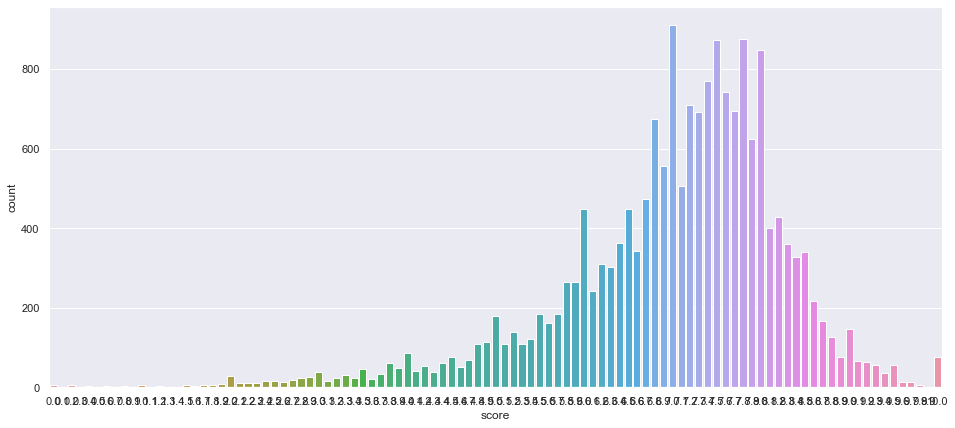

In [306]:
# plotting the data 

sns.set(rc={'figure.figsize': (16,7)})
sns.countplot(reviews_merge['score'])

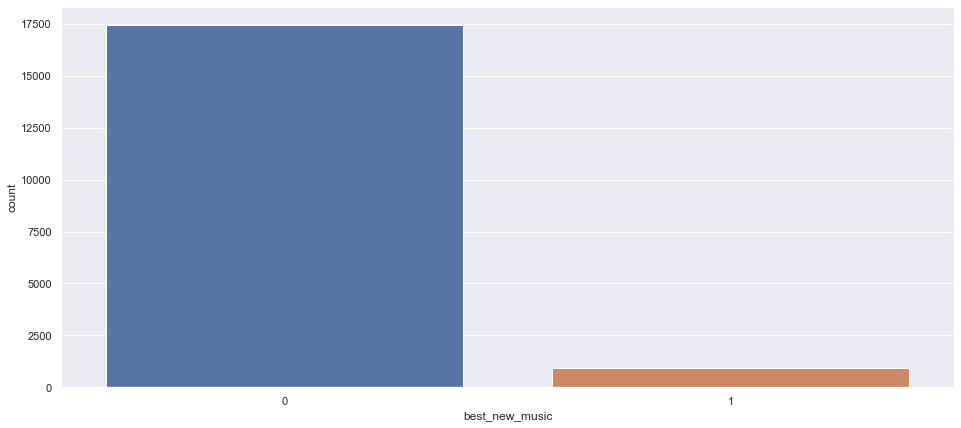

In [307]:
sns.countplot(reviews_merge['best_new_music'])

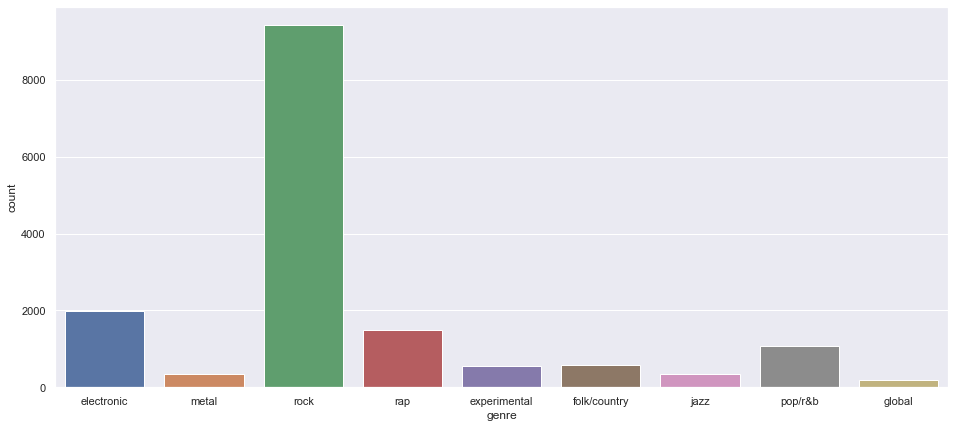

In [310]:
sns.countplot(reviews_merge['genre'])

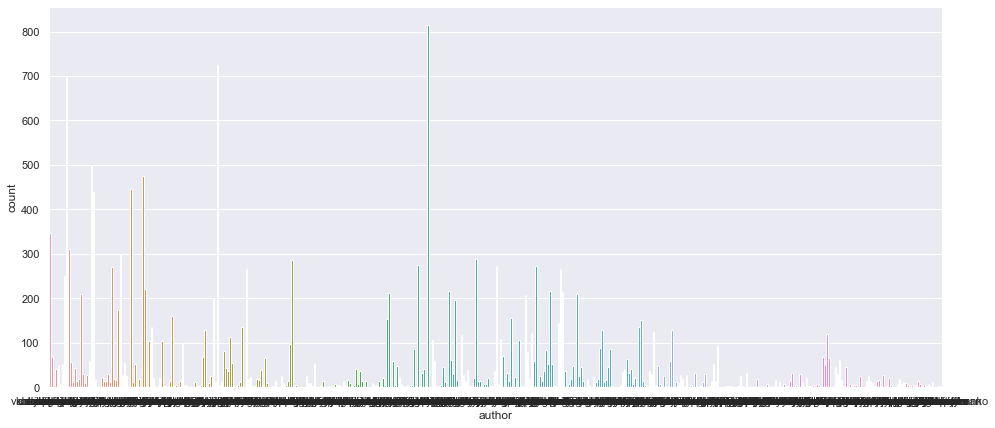

In [309]:
sns.countplot(reviews_merge['author'])

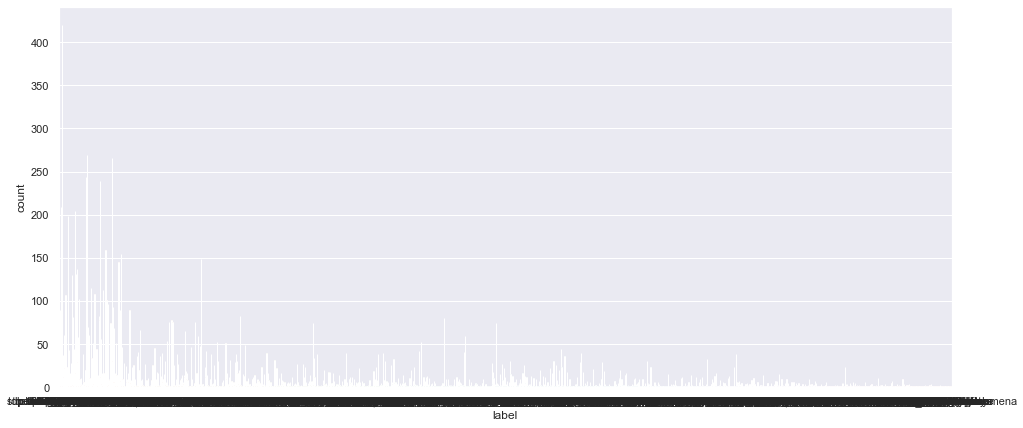

In [311]:
sns.countplot(reviews_merge['label'])

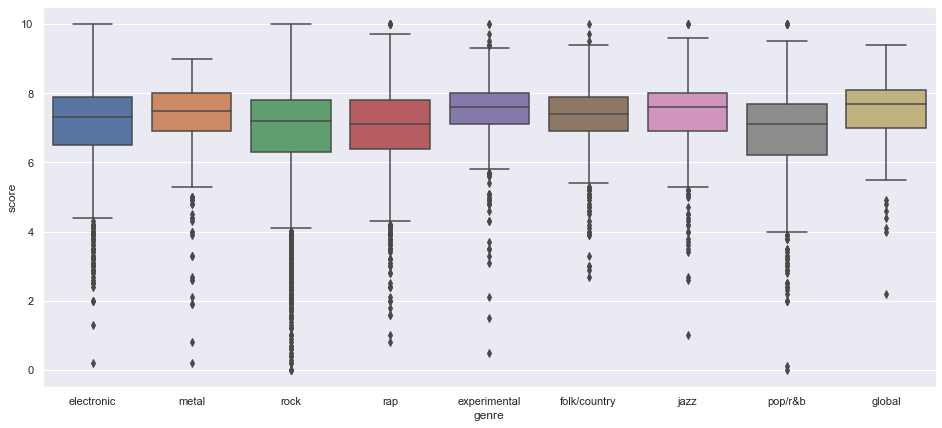

In [313]:
sns.boxplot('genre', 'score', data = reviews_merge)

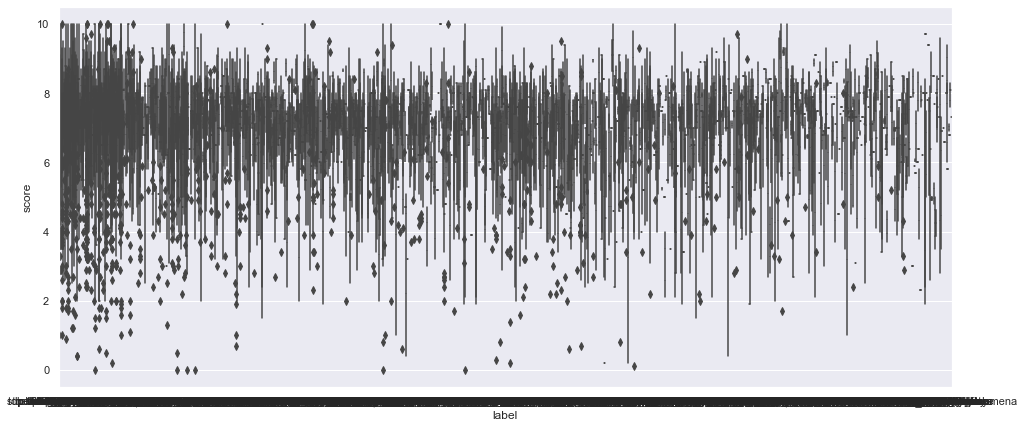

In [314]:
sns.boxplot('label', 'score', data = reviews_merge)

In [86]:
sns.boxplot('genre', 'score', hue = 'label', data = reviews_merge)

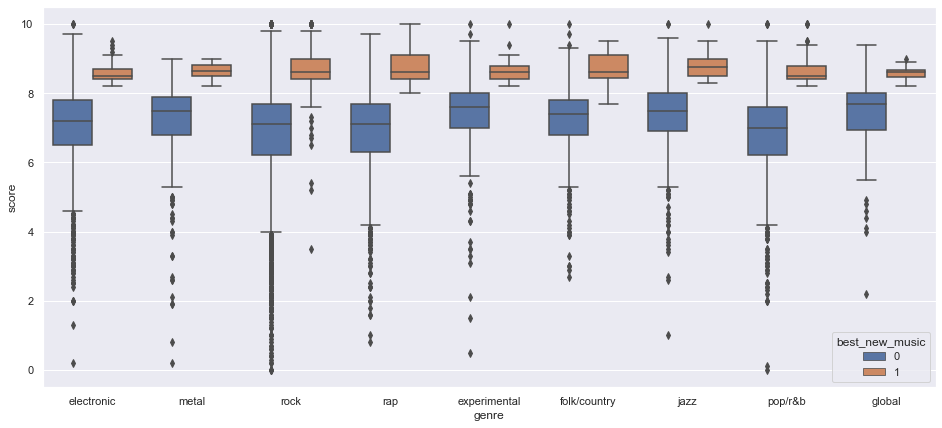

In [315]:
sns.boxplot('genre', 'score', hue = 'best_new_music', data = reviews_merge)

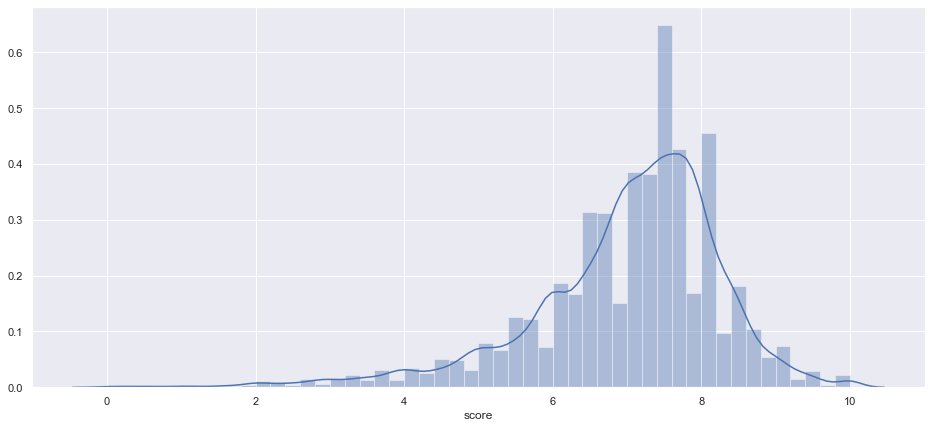

In [316]:
sns.distplot(reviews_merge['score'])

In [13]:
reviews_merge

reviewid        artist_x       genre            label  \
0         22703  massive attack  electronic           virgin   
1         22721        krallice       metal        hathenter   
2         22659    uranium club        rock     static shock   
4         22661         kleenex        rock  kill rock stars   
8         22725            taso  electronic          teklife   
...         ...             ...         ...              ...   
27086      1535         coldcut        jazz       ninja tune   
27088      1341         cassius  electronic      astralwerks   
27089      5376        mojave 3        rock              4ad   
27090      2413   don caballero        rock     touch and go   
27093      3723  neil hamburger         NaN        drag city   

                             title  \
0                        mezzanine   
1                     prelapsarian   
2             all of them naturals   
4                      first songs   
8                        new start   
...                            ...   
27086               let us replay!   
27088                         1999   
27089                  out of tune   
27090  singles breaking up, vol. 1   
27093    left for dead in malaysia   

                                                     url  score  \
0      http://pitchfork.com/reviews/albums/22703-mezz...    9.3   
1      http://pitchfork.com/reviews/albums/22721-prel...    7.9   
2      http://pitchfork.com/reviews/albums/22659-all-...    7.3   
4      http://pitchfork.com/reviews/albums/22661-firs...    9.0   
8      http://pitchfork.com/reviews/albums/22725-new-...    8.1   
...                                                  ...    ...   
27086  http://pitchfork.com/reviews/albums/1535-let-u...    8.9   
27088     http://pitchfork.com/reviews/albums/1341-1999/    4.8   
27089  http://pitchfork.com/reviews/albums/5376-out-o...    6.3   
27090  http://pitchfork.com/reviews/albums/2413-singl...    7.2   
27093  http://pitchfork.com/reviews/albums/3723-left-...    6.5   

       best_new_music           author               author_type  pub_year  
0                   0      nate patrin               contributor      2017  
1                   0         zoe camp               contributor      2017  
2                   0   david glickman               contributor      2017  
4                   1       jenn pelly  associate reviews editor      2017  
8                   0     kevin lozano        tracks coordinator      2017  
...               ...              ...                       ...       ...  
27086               0  james p. wisdom                       NaN      1999  
27088               0  james p. wisdom                       NaN      1999  
27089               0   jason josephes               contributor      1999  
27090               0  james p. wisdom                       NaN      1999  
27093               0   jason josephes               contributor      1999  

[18389 rows x 11 columns]

In [56]:
reviews_merge.columns

Index(['reviewid', 'artist_x', 'genre', 'label', 'title', 'url', 'score',
       'best_new_music', 'author', 'author_type', 'pub_year'],
      dtype='object')

In [50]:
# replacing infinities with nans
reviews_merge.replace([np.inf, -np.inf], np.nan, inplace=True)

In [51]:
# dropping all nans
reviews_merge.dropna(thresh=7,axis='columns', inplace=True)

In [57]:
reviews_merge

reviewid        artist_x       genre            label  \
0         22703  massive attack  electronic           virgin   
1         22721        krallice       metal        hathenter   
2         22659    uranium club        rock     static shock   
4         22661         kleenex        rock  kill rock stars   
8         22725            taso  electronic          teklife   
...         ...             ...         ...              ...   
27086      1535         coldcut        jazz       ninja tune   
27088      1341         cassius  electronic      astralwerks   
27089      5376        mojave 3        rock              4ad   
27090      2413   don caballero        rock     touch and go   
27093      3723  neil hamburger         NaN        drag city   

                             title  \
0                        mezzanine   
1                     prelapsarian   
2             all of them naturals   
4                      first songs   
8                        new start   
...                            ...   
27086               let us replay!   
27088                         1999   
27089                  out of tune   
27090  singles breaking up, vol. 1   
27093    left for dead in malaysia   

                                                     url  score  \
0      http://pitchfork.com/reviews/albums/22703-mezz...    9.3   
1      http://pitchfork.com/reviews/albums/22721-prel...    7.9   
2      http://pitchfork.com/reviews/albums/22659-all-...    7.3   
4      http://pitchfork.com/reviews/albums/22661-firs...    9.0   
8      http://pitchfork.com/reviews/albums/22725-new-...    8.1   
...                                                  ...    ...   
27086  http://pitchfork.com/reviews/albums/1535-let-u...    8.9   
27088     http://pitchfork.com/reviews/albums/1341-1999/    4.8   
27089  http://pitchfork.com/reviews/albums/5376-out-o...    6.3   
27090  http://pitchfork.com/reviews/albums/2413-singl...    7.2   
27093  http://pitchfork.com/reviews/albums/3723-left-...    6.5   

       best_new_music           author               author_type  pub_year  
0                   0      nate patrin               contributor      2017  
1                   0         zoe camp               contributor      2017  
2                   0   david glickman               contributor      2017  
4                   1       jenn pelly  associate reviews editor      2017  
8                   0     kevin lozano        tracks coordinator      2017  
...               ...              ...                       ...       ...  
27086               0  james p. wisdom                       NaN      1999  
27088               0  james p. wisdom                       NaN      1999  
27089               0   jason josephes               contributor      1999  
27090               0  james p. wisdom                       NaN      1999  
27093               0   jason josephes               contributor      1999  

[18389 rows x 11 columns]

In [100]:
reviews_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18389 entries, 0 to 27093
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewid        18389 non-null  int64  
 1   artist_x        18387 non-null  object 
 2   genre           16024 non-null  object 
 3   label           18342 non-null  object 
 4   title           18387 non-null  object 
 5   url             18389 non-null  object 
 6   score           18389 non-null  float64
 7   best_new_music  18389 non-null  int64  
 8   author          18389 non-null  object 
 9   author_type     14485 non-null  object 
 10  pub_year        18389 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 1.7+ MB


In [101]:
reviews_merge['genre'].isna().value_counts()

False    16024
True      2365
Name: genre, dtype: int64

In [102]:
reviews_merge['genre'].value_counts()

rock            9435
electronic      1994
rap             1488
pop/r&b         1087
folk/country     574
experimental     565
metal            357
jazz             341
global           183
Name: genre, dtype: int64

In [103]:
reviews_merge['genre'].isna().value_counts()

False    16024
True      2365
Name: genre, dtype: int64

In [82]:
reviews_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18389 entries, 0 to 27093
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewid        18389 non-null  int64  
 1   artist_x        18387 non-null  object 
 2   genre           18389 non-null  object 
 3   label           18342 non-null  object 
 4   title           18387 non-null  object 
 5   url             18389 non-null  object 
 6   score           18389 non-null  float64
 7   best_new_music  18389 non-null  int64  
 8   author          18389 non-null  object 
 9   author_type     14485 non-null  object 
 10  pub_year        18389 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 1.7+ MB


In [85]:
reviews_merge.columns

Index(['reviewid', 'artist_x', 'genre', 'label', 'title', 'url', 'score',
       'best_new_music', 'author', 'author_type', 'pub_year'],
      dtype='object')

In [66]:
# replacing the NaNs in genre with other 
reviews_merge.fillna(value='other', axis=0, inplace=True)

In [67]:
reviews_merge

reviewid        artist_x       genre            label  \
0         22703  massive attack  electronic           virgin   
1         22721        krallice       metal        hathenter   
2         22659    uranium club        rock     static shock   
4         22661         kleenex        rock  kill rock stars   
8         22725            taso  electronic          teklife   
...         ...             ...         ...              ...   
27086      1535         coldcut        jazz       ninja tune   
27088      1341         cassius  electronic      astralwerks   
27089      5376        mojave 3        rock              4ad   
27090      2413   don caballero        rock     touch and go   
27093      3723  neil hamburger       other        drag city   

                             title  \
0                        mezzanine   
1                     prelapsarian   
2             all of them naturals   
4                      first songs   
8                        new start   
...                            ...   
27086               let us replay!   
27088                         1999   
27089                  out of tune   
27090  singles breaking up, vol. 1   
27093    left for dead in malaysia   

                                                     url  score  \
0      http://pitchfork.com/reviews/albums/22703-mezz...    9.3   
1      http://pitchfork.com/reviews/albums/22721-prel...    7.9   
2      http://pitchfork.com/reviews/albums/22659-all-...    7.3   
4      http://pitchfork.com/reviews/albums/22661-firs...    9.0   
8      http://pitchfork.com/reviews/albums/22725-new-...    8.1   
...                                                  ...    ...   
27086  http://pitchfork.com/reviews/albums/1535-let-u...    8.9   
27088     http://pitchfork.com/reviews/albums/1341-1999/    4.8   
27089  http://pitchfork.com/reviews/albums/5376-out-o...    6.3   
27090  http://pitchfork.com/reviews/albums/2413-singl...    7.2   
27093  http://pitchfork.com/reviews/albums/3723-left-...    6.5   

       best_new_music           author               author_type  pub_year  
0                   0      nate patrin               contributor      2017  
1                   0         zoe camp               contributor      2017  
2                   0   david glickman               contributor      2017  
4                   1       jenn pelly  associate reviews editor      2017  
8                   0     kevin lozano        tracks coordinator      2017  
...               ...              ...                       ...       ...  
27086               0  james p. wisdom                     other      1999  
27088               0  james p. wisdom                     other      1999  
27089               0   jason josephes               contributor      1999  
27090               0  james p. wisdom                     other      1999  
27093               0   jason josephes               contributor      1999  

[18389 rows x 11 columns]

In [117]:
reviews_merge['genre'].isna().value_counts()

False    18389
Name: genre, dtype: int64

In [18]:
reviews_merge.columns

Index(['reviewid', 'artist_x', 'genre', 'label', 'title', 'url', 'score',
       'best_new_music', 'author', 'author_type', 'pub_year'],
      dtype='object')

In [19]:
reviews_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18389 entries, 0 to 27093
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewid        18389 non-null  int64  
 1   artist_x        18389 non-null  object 
 2   genre           18389 non-null  object 
 3   label           18389 non-null  object 
 4   title           18389 non-null  object 
 5   url             18389 non-null  object 
 6   score           18389 non-null  float64
 7   best_new_music  18389 non-null  int64  
 8   author          18389 non-null  object 
 9   author_type     18389 non-null  object 
 10  pub_year        18389 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 1.7+ MB


In [69]:
train, test = statsmodels_train_test_split(reviews_merge)

In [ ]:
# categorical factors - genre, label, author

In [70]:
formula='score ~ C(genre) + C(best_new_music) +  C(author_type)'

In [71]:
fitted_review = smf.ols(formula, data=reviews_merge).fit()
fitted_review.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     88.55
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:27:51   Log-Likelihood:                -29782.
No. Observations:               18389   AIC:                         5.962e+04
Df Residuals:                   18363   BIC:                         5.982e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                       7.4040      0.307     24.090      0.000       6.802       8.006
C(genre)[T.experimental]                        0.3567      0.058      6.100      0.000       0.242       0.471
C(genre)[T.folk/country]                        0.2474      0.058      4.232      0.000       0.133       0.362
C(genre)[T.global]                              0.3936      0.095      4.161      0.000       0.208       0.579
C(genre)[T.jazz]                                0.3098      0.072      4.306      0.000       0.169       0.451
C(genre)[T.metal]                               0.2013      0.071      2.846      0.004       0.063       0.340
C(genre)[T.other]                               0.0440      0.038      1.163      0.245      -0.030       0.118
C(genre)[T.pop/r&b]                            -0.1421      0.047     -3.049      0.002      -0.233      -0.051
C(genre)[T.rap]                                -0.0753      0.043     -1.750      0.080      -0.160       0.009
C(genre)[T.rock]                               -0.0768      0.031     -2.478      0.013      -0.138      -0.016
C(best_new_music)[T.1]                          1.7302      0.041     41.743      0.000       1.649       1.811
C(author_type)[T.associate editor]             -0.6278      0.366     -1.714      0.087      -1.346       0.090
C(author_type)[T.associate features editor]    -1.0855      0.479     -2.266      0.023      -2.025      -0.146
C(author_type)[T.associate reviews editor]      0.1925      0.361      0.534      0.594      -0.515       0.899
C(author_type)[T.associate staff writer]       -0.4367      0.329     -1.328      0.184      -1.081       0.208
C(author_type)[T.contributing editor]          -0.0095      0.318     -0.030      0.976      -0.633       0.614
C(author_type)[T.contributor]                  -0.4477      0.306     -1.463      0.144      -1.048       0.152
C(author_type)[T.deputy news editor]           -0.3949      0.329     -1.199      0.231      -1.041       0.251
C(author_type)[T.editor-in-chief]              -0.4582      0.333     -1.374      0.169      -1.112       0.195
C(author_type)[T.executive editor]             -0.1786      0.311     -0.574      0.566      -0.788       0.431
C(author_type)[T.managing editor]              -0.7745      0.770     -1.006      0.314      -2.283       0.734
C(author_type)[T.news director]                -1.6974      0.627     -2.709      0.007      -2.926      -0.469
C(author_type)[T.other]                        -0.5596      0.307     -1.826      0.068      -1.160       0.041
C(author_type)[T.senior editor]                -0.5505      0.311     -1.770      0.077      -1.160       0.059
C(author_type)[T.senior staff writer]          -0.8374     

In [72]:
y_test_pred = fitted_review.predict(test)

In [73]:
y_test_pred

26195    6.869035
12727    6.956318
12003    6.844457
5114     6.956318
12069    6.879499
           ...   
10088    6.879499
1998     6.814223
18369    6.767637
788      6.888468
4720     7.000330
Length: 4598, dtype: float64

In [65]:
test.iloc[0,:]

artist_x                                            various artists
genre                                                           NaN
label                                                       maybach
title                                     mmg presents: self made 2
url               http://pitchfork.com/reviews/albums/16879-mmg-...
score                                                           6.2
best_new_music                                                    0
author                                                    ian cohen
author_type                                             contributor
pub_year                                                       2012
reviewid                                                      16879
Name: 7274, dtype: object

In [47]:
y_test_pred[y_test_pred<0]

Series([], dtype: float64)

In [64]:
reviews_merge.iloc[7275]

reviewid                                                      14780
artist_x                                                 sun airway
genre                                                       pop/r&b
label                                                   dead oceans
title                       nocturne of exploded crystal chandelier
url               http://pitchfork.com/reviews/albums/14780-noct...
score                                                           7.8
best_new_music                                                    0
author                                                    ian cohen
author_type                                             contributor
pub_year                                                       2010
Name: 10275, dtype: object

In [48]:
test['score']

7274     6.2
23638    6.0
13379    7.5
17944    7.2
8800     6.2
        ... 
20082    6.8
135      6.9
13097    7.4
16877    5.8
10690    6.5
Name: score, Length: 4598, dtype: float64

In [49]:
test['score'].describe()

count    4598.000000
mean        6.975968
std         1.292194
min         0.000000
25%         6.400000
50%         7.200000
75%         7.800000
max        10.000000
Name: score, dtype: float64

In [50]:
test['score'].isna().value_counts()

False    4598
Name: score, dtype: int64

In [42]:
# y_test_pred.dropna(inplace=True)

In [54]:
y_test_pred.isna().value_counts()

False    4598
dtype: int64

In [53]:
y_test_pred.fillna(value=0,  inplace=True)

In [74]:
r2_score(test['score'], y_test_pred)

0.10466255791627554

In [57]:
reviews_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18389 entries, 0 to 27093
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewid        18389 non-null  int64  
 1   artist_x        18389 non-null  object 
 2   genre           18389 non-null  object 
 3   label           18389 non-null  object 
 4   title           18389 non-null  object 
 5   url             18389 non-null  object 
 6   score           18389 non-null  float64
 7   best_new_music  18389 non-null  int64  
 8   author          18389 non-null  object 
 9   author_type     18389 non-null  object 
 10  pub_year        18389 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 1.7+ MB


In [75]:
mean_squared_error(test['score'], y_test_pred)

1.5140927824759791

In [334]:
reviews_merge.columns

Index(['reviewid', 'artist_x', 'genre', 'label', 'title', 'url', 'score',
       'best_new_music', 'author', 'author_type', 'pub_year'],
      dtype='object')

In [335]:
reviews_merge.author.value_counts()

joe tangari                                                    815
stephen m. deusner                                             725
ian cohen                                                      699
brian howe                                                     500
mark richardson                                                476
stuart berman                                                  445
marc hogan                                                     439
nate patrin                                                    347
marc masters                                                   312
jayson greene                                                  299
grayson currin                                                 289
brandon stosuy                                                 287
matthew murphy                                                 274
dominique leone                                                273
jess harvell                                                  

In [336]:
reviews_merge.author_type.value_counts()

contributor                  12420
senior editor                  486
executive editor               475
senior staff writer            439
contributing editor            210
associate staff writer         105
deputy news editor             100
editor-in-chief                 85
tracks coordinator              52
associate reviews editor        41
associate editor                37
assistant editor                16
associate features editor       11
news director                    5
managing editor                  3
Name: author_type, dtype: int64

In [337]:
reviews_merge.genre.value_counts()

rock            9435
electronic      1994
rap             1488
pop/r&b         1087
folk/country     574
experimental     565
metal            357
jazz             341
global           183
Name: genre, dtype: int64

In [339]:
reviews_merge.pub_year.value_counts()

2016    1265
2007    1216
2008    1201
2013    1200
2005    1186
2012    1185
2006    1185
2009    1171
2010    1170
2011    1165
2014    1162
2015    1135
2004    1121
2003    1060
2002     923
2001     456
2000     348
1999     223
2017      17
Name: pub_year, dtype: int64

In [340]:
reviews_merge.label.value_counts()

self-released       420
drag city           269
sub pop             266
thrill jockey       244
merge               239
                   ... 
tru thoughts          1
silence               1
deathbomb arc         1
angura sound          1
malicious damage      1
Name: label, Length: 3233, dtype: int64

In [341]:
reviews_merge.artist_x.value_counts()

various artists        687
neil young              23
guided by voices        23
the beatles             21
bonnie prince billy     21
                      ... 
young moe                1
metal hearts             1
leika                    1
zulu winter              1
methyl ethel             1
Name: artist_x, Length: 8425, dtype: int64

In [342]:
reviews_merge.reviewid.value_counts()

2047     1
17053    1
10896    1
14994    1
12947    1
        ..
17698    1
21792    1
11551    1
9502     1
2049     1
Name: reviewid, Length: 18389, dtype: int64

In [343]:
reviews_merge.loc[reviews_merge['reviewid']==9460]


reviewid artist_x genre       label                title  \
17653      9460  xasthur  rock  hydra head  subliminal genocide   

                                                     url  score  \
17653  http://pitchfork.com/reviews/albums/9460-subli...    7.8   

       best_new_music          author  author_type  pub_year  
17653               0  brandon stosuy  contributor      2006

In [344]:
reviews_merge.loc[reviews_merge['reviewid']==9417]

reviewid             artist_x   genre      label       title  \
17397      9417  easy star all-stars  global  easy star  radiodread   

                                                     url  score  \
17397  http://pitchfork.com/reviews/albums/9417-radio...    7.0   

       best_new_music       author  author_type  pub_year  
17397               0  joe tangari  contributor      2006

In [345]:
reviews_merge.head()

reviewid        artist_x       genre            label  \
0     22703  massive attack  electronic           virgin   
1     22721        krallice       metal        hathenter   
2     22659    uranium club        rock     static shock   
4     22661         kleenex        rock  kill rock stars   
8     22725            taso  electronic          teklife   

                  title                                                url  \
0             mezzanine  http://pitchfork.com/reviews/albums/22703-mezz...   
1          prelapsarian  http://pitchfork.com/reviews/albums/22721-prel...   
2  all of them naturals  http://pitchfork.com/reviews/albums/22659-all-...   
4           first songs  http://pitchfork.com/reviews/albums/22661-firs...   
8             new start  http://pitchfork.com/reviews/albums/22725-new-...   

   score  best_new_music          author               author_type  pub_year  
0    9.3               0     nate patrin               contributor      2017  
1    7.9               0        zoe camp               contributor      2017  
2    7.3               0  david glickman               contributor      2017  
4    9.0               1      jenn pelly  associate reviews editor      2017  
8    8.1               0    kevin lozano        tracks coordinator      2017

In [346]:
reviews_merge.to_csv('/Users/TheUnit/Desktop/Marilyn-FinalCapstone/reviews_merge.csv')

In [25]:
twentysixteen = reviews_merge[reviews_merge.pub_year == 2016]
twentysixteen

reviewid                   artist_x         genre          label  \
23       22719          chance the rapper           rap  self-released   
27       22667            jamire williams  experimental        leaving   
28       22691                  the-dream           rap    radio killa   
30       22702             worm ouroboros         metal  profound lore   
31       22718            nine inch nails          rock  self-released   
...        ...                        ...           ...            ...   
1794     21337                    pusha t           rap        def jam   
1796     21328              primal scream          rock       creation   
1798     21349                 aesop rock           rap  self-released   
1800     21331  teenage jesus & the jerks          rock   other people   
1801     21352            various artists           NaN          milan   

                         title  \
23    merry christmas lil mama   
27             ///// effectual   
28           love you to death   
30         what graceless dawn   
31    not the actual events ep   
...                        ...   
1794       darkest before dawn   
1796             screamadelica   
1798                   lice ep   
1800            live 1977-1979   
1801          the revenant ost   

                                                    url  score  \
23    http://pitchfork.com/reviews/albums/22719-merr...    8.1   
27    http://pitchfork.com/reviews/albums/22667-effe...    7.2   
28    http://pitchfork.com/reviews/albums/22691-love...    7.0   
30    http://pitchfork.com/reviews/albums/22702-what...    7.5   
31    http://pitchfork.com/reviews/albums/22718-not-...    6.3   
...                                                 ...    ...   
1794  http://pitchfork.com/reviews/albums/21337-dark...    8.2   
1796  http://pitchfork.com/reviews/albums/21328-scre...    9.0   
1798  http://pitchfork.com/reviews/albums/21349-lice...    7.7   
1800  http://pitchfork.com/reviews/albums/21331-live...    7.8   
1801  http://pitchfork.com/reviews/albums/21352-the-...    7.3   

      best_new_music             author             author_type  pub_year  
23                 0     sheldon pearce  associate staff writer      2016  
27                 0    benjamin scheim             contributor      2016  
28                 0  rebecca haithcoat             contributor      2016  
30                 0       sam sodomsky  associate staff writer      2016  
31                 0    benjamin scheim             contributor      2016  
...              ...                ...                     ...       ...  
1794               0      craig jenkins             contributor      2016  
1796               1          tom ewing             contributor      2016  
1798               0           ron hart             contributor      2016  
1800               0   raymond cummings             contributor      2016  
1801               0      nina corcoran             contributor      2016  

[1265 rows x 11 columns]

In [348]:
twentysixteen.reviewid.value_counts()

22527    1
21622    1
21614    1
21615    1
21616    1
        ..
22075    1
22076    1
22077    1
22078    1
22528    1
Name: reviewid, Length: 1265, dtype: int64

In [349]:
twentysixteen.loc[twentysixteen['reviewid']==22341]

reviewid              artist_x genre        label        title  \
572     22341  soundwalk collective  rock  bella union  killer road   

                                                   url  score  best_new_music  \
572  http://pitchfork.com/reviews/albums/22341-kill...    6.6               0   

                  author  author_type  pub_year  
572  winston cook-wilson  contributor      2016

In [350]:
twentysixteen.to_csv('/Users/TheUnit/Desktop/Marilyn-FinalCapstone/twentysixteen.csv')

In [26]:
train, test = statsmodels_train_test_split(twentysixteen)

In [27]:
formula='score ~ C(genre) + C(best_new_music)'

In [28]:
fitted_2016 = smf.ols(formula, data=twentysixteen).fit()
fitted_2016.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     25.21
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           6.38e-40
Time:                        12:16:05   Log-Likelihood:                -1642.6
No. Observations:                1194   AIC:                             3305.
Df Residuals:                    1184   BIC:                             3356.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    7.0815      0.067    105.626      0.000       6.950       7.213
C(genre)[T.experimental]     0.2694      0.118      2.275      0.023       0.037       0.502
C(genre)[T.folk/country]     0.3446      0.154      2.237      0.025       0.042       0.647
C(genre)[T.global]           0.2925      0.216      1.356      0.175      -0.131       0.716
C(genre)[T.jazz]             0.5246      0.170      3.087      0.002       0.191       0.858
C(genre)[T.metal]            0.2458      0.158      1.554      0.121      -0.065       0.556
C(genre)[T.pop/r&b]         -0.1228      0.111     -1.111      0.267      -0.340       0.094
C(genre)[T.rap]             -0.1391      0.097     -1.428      0.154      -0.330       0.052
C(genre)[T.rock]             0.0782      0.081      0.962      0.336      -0.081       0.238
C(best_new_music)[T.1]       1.4735      0.107     13.773      0.000       1.264       1.683
==============================================================================
Omnibus:                      172.638   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              516.279
Skew:                          -0.729   Prob(JB):                    7.79e-113
Kurtosis:                       5.872   Cond. No.                         9.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
y_test_pred = fitted_2016.predict(test)

In [30]:
y_test_pred

1121    7.159713
561     8.633170
1675    7.081475
65      7.081475
513     7.159713
1682    7.159713
1522    7.081475
182     6.958709
652     7.081475
1456    7.159713
425     7.081475
1659    7.159713
619     8.432167
865     6.958709
1740    6.958709
1281         NaN
626          NaN
1127    6.958709
1449    6.942348
315     7.081475
284     6.958709
842     6.958709
381     7.373934
507     7.327256
1003    7.159713
1059    6.958709
76           NaN
482     7.081475
769     6.942348
610     6.942348
244     7.426106
614     7.350916
1271    7.159713
387     7.327256
1437    6.942348
710     6.942348
693          NaN
1705    7.159713
1689    7.350916
1045    6.942348
61      7.350916
1311    7.159713
384     7.350916
1347    7.081475
1145    7.081475
729          NaN
402     7.327256
918     7.606124
172     7.159713
1496    7.159713
276     7.606124
445     6.958709
273     6.958709
997     6.958709
890     7.159713
795     7.159713
80      6.942348
1591    7.159713
1771    7.0814

In [31]:
r2_score(test['score'], y_test_pred)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [367]:
mean_squared_error(test['score'], y_test_pred)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [368]:
test['score'].isna().value_counts()

False    317
Name: score, dtype: int64

In [369]:
y_test_pred.isna().value_counts()

False    299
True      18
dtype: int64

In [32]:
best = twentysixteen[twentysixteen.score >= 10]

In [33]:
best

reviewid          artist_x         genre         label  \
281      22374  public image ltd          rock     universal   
292      22485         bob dylan          rock      columbia   
488      22061         brian eno  experimental        island   
641      22174     stevie wonder       pop/r&b        motown   
745      22159       nina simone          jazz       philips   
908      22053        neil young          rock       reprise   
997      21964         kate bush       pop/r&b           emi   
1195     21845            prince          rock  paisley park   
1197     21842            prince          rock  warner bros.   
1211     21841            prince          rock  warner bros.   
1215     21866            prince          rock  warner bros.   
1548     21548   michael jackson       pop/r&b        legacy   
1704     21487       david bowie          rock           rca   
1706     21478       david bowie          rock           rca   

                         title  \
281                  metal box   
292        blood on the tracks   
488        another green world   
641   songs in the key of life   
745                 in concert   
908        tonight's the night   
997             hounds of love   
1195        sign "o" the times   
1197                      1999   
1211               purple rain   
1215                dirty mind   
1548              off the wall   
1704                  "heroes"   
1706                       low   

                                                    url  score  \
281   http://pitchfork.com/reviews/albums/22374-meta...   10.0   
292   http://pitchfork.com/reviews/albums/22485-bloo...   10.0   
488   http://pitchfork.com/reviews/albums/22061-anot...   10.0   
641   http://pitchfork.com/reviews/albums/22174-song...   10.0   
745   http://pitchfork.com/reviews/albums/22159-the-...   10.0   
908   http://pitchfork.com/reviews/albums/22053-toni...   10.0   
997   http://pitchfork.com/reviews/albums/21964-houn...   10.0   
1195  http://pitchfork.com/reviews/albums/21845-sign...   10.0   
1197    http://pitchfork.com/reviews/albums/21842-1999/   10.0   
1211  http://pitchfork.com/reviews/albums/21841-purp...   10.0   
1215  http://pitchfork.com/reviews/albums/21866-dirt...   10.0   
1548  http://pitchfork.com/reviews/albums/21548-off-...   10.0   
1704  http://pitchfork.com/reviews/albums/21487-heroes/   10.0   
1706     http://pitchfork.com/reviews/albums/21478-low/   10.0   

      best_new_music           author       author_type  pub_year  
281                1   simon reynolds       contributor      2016  
292                0     jesse jarnow       contributor      2016  
488                0      mike powell       contributor      2016  
641                0       alan light               NaN      2016  
745                0  carvell wallace       contributor      2016  
908                0  mark richardson  executive editor      2016  
997                0    barry walters       contributor      2016  
1195               0    nelson george       contributor      2016  
1197               0   maura johnston       contributor      2016  
1211               0  carvell wallace       contributor      2016  
1215               0    barry walters       contributor      2016  
1548               1      ryan dombal     senior editor      2016  
1704               0      ryan dombal     senior editor      2016  
1706               0     laura snapes       contributor      2016

In [360]:
best.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 281 to 1706
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewid        14 non-null     int64  
 1   artist_x        14 non-null     object 
 2   genre           14 non-null     object 
 3   label           14 non-null     object 
 4   title           14 non-null     object 
 5   url             14 non-null     object 
 6   score           14 non-null     float64
 7   best_new_music  14 non-null     int64  
 8   author          14 non-null     object 
 9   author_type     13 non-null     object 
 10  pub_year        14 non-null     int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 1.3+ KB


In [370]:
best.to_csv('/Users/TheUnit/Desktop/Marilyn-FinalCapstone/best.csv')

In [ ]:
# model on perfect 10s

In [34]:
def statsmodels_train_test_split(df, stratify=None, **kwargs):

    if stratify is None:
        y, X = df.iloc[:,0], df.drop(columns=df.columns[0])
        X_train, X_test, y_train, y_test = train_test_split(X,y, **kwargs)
    else:
        y, X = stratify, df.drop(columns = stratify.name)
        X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, **kwargs)
    
    return pd.concat([X_train, y_train], axis=1), pd.concat([X_test, y_test], axis=1)

In [35]:
train, test = statsmodels_train_test_split(best)

In [36]:
formula='score ~ C(genre) + C(best_new_music)'

In [39]:
fitted_best = smf.ols(formula, data=best).fit()
fitted_best.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -2.250
Date:                Mon, 21 Sep 2020   Prob (F-statistic):               1.00
Time:                        12:18:58   Log-Likelihood:                 437.30
No. Observations:                  14   AIC:                            -864.6
Df Residuals:                       9   BIC:                            -861.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 10.0000    8.2e-15   1.22e+15      0.000      10.000      10.000
C(genre)[T.jazz]       -3.622e-15   1.16e-14     -0.312      0.762   -2.99e-14    2.26e-14
C(genre)[T.pop/r&b]    -8.882e-16   9.72e-15     -0.091      0.929   -2.29e-14    2.11e-14
C(genre)[T.rock]        2.665e-15   8.68e-15      0.307      0.766    -1.7e-14    2.23e-14
C(best_new_music)[T.1]  3.553e-15   6.58e-15      0.540      0.602   -1.13e-14    1.84e-14
==============================================================================
Omnibus:                        4.032   Durbin-Watson:                   0.188
Prob(Omnibus):                  0.133   Jarque-Bera (JB):                1.695
Skew:                           0.791   Prob(JB):                        0.428
Kurtosis:                       3.635   Cond. No.                         9.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
y_test_pred = fitted_best.predict(test)

In [41]:
y_test_pred

1704    10.0
1197    10.0
1548    10.0
641     10.0
dtype: float64

In [42]:
r2_score(test['score'], y_test_pred)

0.0

In [43]:
mean_squared_error(test['score'], y_test_pred)

4.1020767071492614e-29